# Lab9- Spatial Autocorrelation and Regression

In [2]:
!pip install esda

  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122791 sha256=8e997092637e9227da647b4596f7d7a7ce88b358d178901d1d9680fc48d2d559
  Stored in directory: c:\users\ramak\appdata\local\pip\cache\wheels\92\4b\14\df69615cd54ad1ce64b70d141dee8b269ebc7ace679cef9f3f
Successfully built esda


In [1]:
## install the requried PySAL packages first  
## https://pysal.org/docs/install/
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

(7078, 275)


,OBJECTID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,...,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
0,1,55001002750001,55001,Adams,00275,5500100275,Adams,C,Adams - C 0001,25,...,0.0,230.0,137.0,92.0,0.0,0.0,0.0,1.0,0.0,"POLYGON ((-89.82780 43.96684, -89.82795 43.966..."
1,2,55001002750002,55001,Adams,00275,5500100275,Adams,C,Adams - C 0002,25,...,0.0,224.0,135.0,89.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.80944 43.95238, -89.80945 43.953..."
2,3,55001002750003,55001,Adams,00275,5500100275,Adams,C,Adams - C 0003,25,...,0.0,100.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.79773 43.96678, -89.79774 43.966..."
3,4,55001002750004,55001,Adams,00275,5500100275,Adams,C,Adams - C 0004,25,...,0.0,125.0,75.0,50.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.81767 43.95958, -89.81778 43.964..."
4,5,55001003000001,55001,Adams,00300,5500100300,Adams,T,Adams - T 0001,43,...,0.0,335.0,185.0,150.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.71671 43.89444, -89.71671 43.894..."


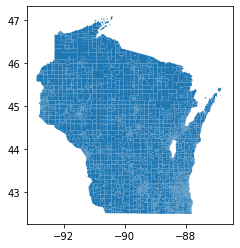

In [3]:
# data : https://data-ltsb.opendata.arcgis.com/datasets/2012-2020-election-data-with-2020-wards
gdf = gpd.read_file('2012-2020_Election_Data_with_2020_Wards.geojson')
gdf.plot()
print(gdf.shape)
gdf.head()

In [6]:
# Variables in each voting district (WARD)
# Democratic Votes: PREDEM20
# Republican Votes: PREREP20
# Total Votes:PRETOT20

In [7]:
Milwaukee= gdf[(gdf['CNTY_NAME']=='Milwaukee')]
Milwaukee

,OBJECTID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,...,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
3310,3312,55079054500001,55079,Milwaukee,05450,5507905450,Bayside,V,Bayside - V 0001,47,...,1.0,341.0,6.0,303.0,0.0,0.0,0.0,32.0,0.0,"POLYGON ((-87.90896 43.18307, -87.90919 43.182..."
3311,3313,55079054500002,55079,Milwaukee,05450,5507905450,Bayside,V,Bayside - V 0002,47,...,0.0,259.0,7.0,235.0,0.0,0.0,0.0,17.0,0.0,"POLYGON ((-87.90191 43.17615, -87.90204 43.176..."
3312,3314,55079054500003,55079,Milwaukee,05450,5507905450,Bayside,V,Bayside - V 0003,47,...,0.0,230.0,4.0,205.0,0.0,0.0,0.0,21.0,0.0,"POLYGON ((-87.90906 43.18400, -87.90918 43.184..."
3313,3315,55079054500004,55079,Milwaukee,05450,5507905450,Bayside,V,Bayside - V 0004,47,...,0.0,391.0,10.0,355.0,0.0,0.0,0.0,26.0,0.0,"POLYGON ((-87.89513 43.18388, -87.89511 43.185..."
3314,3316,55079054500005,55079,Milwaukee,05450,5507905450,Bayside,V,Bayside - V 0005,47,...,2.0,384.0,4.0,351.0,0.0,0.0,0.0,29.0,0.0,"POLYGON ((-87.89272 43.19202, -87.89273 43.192..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,3877,55079867000008,55079,Milwaukee,86700,5507986700,Whitefish Bay,V,Whitefish Bay - V 0008,47,...,0.0,313.0,11.0,267.0,0.0,0.0,0.0,35.0,0.0,"POLYGON ((-87.90211 43.10762, -87.90101 43.107..."
3876,3878,55079867000009,55079,Milwaukee,86700,5507986700,Whitefish Bay,V,Whitefish Bay - V 0009,47,...,0.0,684.0,22.0,583.0,0.0,0.0,0.0,79.0,0.0,"POLYGON ((-87.90211 43.10762, -87.90211 43.107..."
3877,3879,55079867000010,55079,Milwaukee,86700,5507986700,Whitefish Bay,V,Whitefish Bay - V 0010,47,...,0.0,771.0,26.0,656.0,0.0,0.0,0.0,89.0,0.0,"POLYGON ((-87.89057 43.11113, -87.89135 43.111..."
3878,3880,55079867000011,55079,Milwaukee,86700,5507986700,Whitefish Bay,V,Whitefish Bay - V 0011,47,...,1.0,254.0,9.0,213.0,0.0,0.0,0.0,32.0,0.0,"POLYGON ((-87.89474 43.10021, -87.89473 43.101..."


In [8]:
#deal with missing value NaN
print(pd.isnull(Milwaukee['PREDEM20']).sum())
print(pd.isnull(Milwaukee['PREREP20']).sum())
print(pd.isnull(Milwaukee['PRETOT20']).sum())

0
0
0


In [10]:
print(gdf[gdf['CNTY_NAME'] == 'Dane']['PREDEM20'].isnull().sum())
print(gdf[gdf['CNTY_NAME'] == 'Dane']['PREREP20'].isnull().sum())
print(gdf[gdf['CNTY_NAME'] == 'Dane']['PRETOT20'].isnull().sum())

7
7
7


In [11]:
# Fill up null values with mean
Milwaukee['PREDEM20'].fillna((Milwaukee['PREDEM20'].mean()), inplace=True) 
Milwaukee['PREREP20'].fillna((Milwaukee['PREREP20'].mean()), inplace=True) 
Milwaukee['PRETOT20'].fillna((Milwaukee['PRETOT20'].mean()), inplace=True) 

C:\Users\ramak\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [4]:
dane_county= gdf[(gdf['CNTY_NAME']=='Dane')]
dane_county

,OBJECTID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,...,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
818,819,55025008750001,55025,Dane,00875,5502500875,Albion,T,Albion - T 0001,43,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.04186 42.86069, -89.04260 42.861..."
819,820,55025008750002,55025,Dane,00875,5502500875,Albion,T,Albion - T 0002,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.01307 42.93539, -89.01318 42.935..."
820,821,55025063000001,55025,Dane,06300,5502506300,Belleville,V,Belleville - V 0001,47,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.53044 42.86397, -89.53044 42.863..."
821,822,55025063000002,55025,Dane,06300,5502506300,Belleville,V,Belleville - V 0002,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.54878 42.87129, -89.54880 42.871..."
822,823,55025070250001,55025,Dane,07025,5502507025,Berry,T,Berry - T 0001,43,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.66636 43.11880, -89.66629 43.118..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1302,55025515750022,55025,Dane,51575,5502551575,Middleton,C,Middleton - C 0022,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.53994 43.10518, -89.53994 43.105..."
1302,1303,55025776750016,55025,Dane,77675,5502577675,Stoughton,C,Stoughton - C 0016,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.25020 42.93934, -89.25079 42.939..."
1303,1304,55025786000027,55025,Dane,78600,5502578600,Sun Prairie,C,Sun Prairie - C 0027,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.19108 43.19881, -89.18827 43.198..."
1304,1305,55025877250010,55025,Dane,87725,5502587725,Windsor,V,Windsor - V 0010,47,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.34318 43.21204, -89.34334 43.212..."


In [5]:
dane_county['PREDEM20'].fillna((dane_county['PREDEM20'].mean()), inplace=True) 
dane_county['PREREP20'].fillna((dane_county['PREREP20'].mean()), inplace=True) 
dane_county['PRETOT20'].fillna((dane_county['PRETOT20'].mean()), inplace=True) 

C:\Users\ramak\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [6]:
print(pd.isnull(dane_county['PREDEM20']).sum())
print(pd.isnull(dane_county['PREREP20']).sum())
print(pd.isnull(dane_county['PRETOT20']).sum())

0
0
0


In [15]:
dane_county

,OBJECTID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,...,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
818,819,55025008750001,55025,Dane,00875,5502500875,Albion,T,Albion - T 0001,43,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.04186 42.86069, -89.04260 42.861..."
819,820,55025008750002,55025,Dane,00875,5502500875,Albion,T,Albion - T 0002,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.01307 42.93539, -89.01318 42.935..."
820,821,55025063000001,55025,Dane,06300,5502506300,Belleville,V,Belleville - V 0001,47,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.53044 42.86397, -89.53044 42.863..."
821,822,55025063000002,55025,Dane,06300,5502506300,Belleville,V,Belleville - V 0002,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.54878 42.87129, -89.54880 42.871..."
822,823,55025070250001,55025,Dane,07025,5502507025,Berry,T,Berry - T 0001,43,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.66636 43.11880, -89.66629 43.118..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1302,55025515750022,55025,Dane,51575,5502551575,Middleton,C,Middleton - C 0022,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.53994 43.10518, -89.53994 43.105..."
1302,1303,55025776750016,55025,Dane,77675,5502577675,Stoughton,C,Stoughton - C 0016,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.25020 42.93934, -89.25079 42.939..."
1303,1304,55025786000027,55025,Dane,78600,5502578600,Sun Prairie,C,Sun Prairie - C 0027,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.19108 43.19881, -89.18827 43.198..."
1304,1305,55025877250010,55025,Dane,87725,5502587725,Windsor,V,Windsor - V 0010,47,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.34318 43.21204, -89.34334 43.212..."


In [16]:
## spatial weights: https://pysal.org/libpysal/generated/libpysal.weights.Queen.html

sw =  lps.weights.Queen.from_dataframe(dane_county)
sw.transform = 'r'

In [18]:
#For neighborhood the spatial lag is

x = dane_county['PREDEM20']
y = dane_county['PREREP20']
z = dane_county['PRETOT20']
xlag = lps.weights.lag_spatial(sw, x)
xlag

array([ 170.33333333,  245.        ,  347.        ,  312.66666667,
        270.        ,  340.        ,  265.5       ,  229.        ,
        249.57142857, 1068.4       ,  556.7       ,  496.18181818,
        396.        ,  372.86666667,  440.77920998,  291.        ,
        396.4       ,  630.        ,  252.33333333,  411.        ,
        672.35714286,  450.0625    ,  614.75      ,  401.47619048,
        299.        ,  221.        ,  266.42857143,  248.        ,
        322.5       ,  257.125     ,  323.4       ,  360.33333333,
        197.66666667,  286.6       ,  276.        ,  219.        ,
        312.33333333,  266.66666667,  201.        ,  335.5       ,
        308.5       ,  223.77777778,  315.55555556,  336.5       ,
        284.57142857,  316.28571429,  248.2       ,  320.66666667,
        289.7986833 ,  349.75      ,  289.83333333,  270.25      ,
        396.        ,  295.        ,  304.16424116,  372.        ,
        295.        ,  288.        ,  335.375     ,  321.     

In [19]:
ylag = lps.weights.lag_spatial(sw, y)
ylag

array([142.66666667, 221.33333333, 167.        , 156.        ,
       190.        , 224.5       , 179.        , 157.5       ,
       154.42857143, 137.2       , 168.2       , 144.27272727,
       238.        , 181.2       , 243.88128898, 248.8       ,
       270.2       , 321.85714286, 147.66666667, 237.5       ,
       198.85714286, 198.375     , 247.        , 137.57142857,
       210.5       , 163.        , 200.71428571, 197.55555556,
       162.5       , 156.375     , 157.2       , 190.83333333,
       105.66666667, 139.4       , 140.55555556, 116.        ,
       175.66666667, 163.        , 112.        , 172.        ,
       182.5       , 118.44444444, 135.55555556, 133.2       ,
       185.        , 206.28571429, 111.86666667, 161.66666667,
       127.96881497, 197.25      , 157.33333333, 160.        ,
       201.        , 163.5       , 164.28311117, 212.2       ,
       163.5       , 333.        , 266.75      , 226.25      ,
       193.5       , 199.5       , 203.63636364, 203.71

In [20]:
zlag = lps.weights.lag_spatial(sw, z)
zlag

array([ 318.16666667,  474.66666667,  523.        ,  478.66666667,
        468.66666667,  573.5       ,  450.        ,  393.        ,
        412.42857143, 1224.6       ,  736.5       ,  651.81818182,
        647.        ,  564.86666667,  697.36902287,  551.        ,
        680.        ,  972.        ,  405.33333333,  658.        ,
        887.85714286,  661.375     ,  879.875     ,  547.23809524,
        515.        ,  390.        ,  474.85714286,  453.55555556,
        494.16666667,  420.625     ,  490.2       ,  561.66666667,
        307.66666667,  435.2       ,  423.        ,  340.14285714,
        496.        ,  438.        ,  317.25      ,  516.        ,
        503.        ,  348.77777778,  458.22222222,  477.3       ,
        479.14285714,  532.14285714,  365.93333333,  490.33333333,
        424.44837145,  555.5       ,  454.83333333,  437.5       ,
        607.        ,  464.        ,  476.39354286,  593.4       ,
        464.        ,  632.        ,  612.75      ,  559.5    

### Task: 1 Global Spatial Autocorrelation

In [22]:
# compute the Global Spatial Autocorrelation Coefficient Moran's I for this new variable.

np.random.seed(12345)
mi = esda.moran.Moran(x, sw)
mi.I

0.346616396411255

In [23]:
# compute the Global Spatial Autocorrelation Coefficient Moran's I for this new variable.

np.random.seed(12345)
mi = esda.moran.Moran(y, sw)
mi.I

0.04501944226482826

In [24]:
# compute the Global Spatial Autocorrelation Coefficient Moran's I for this new variable.

np.random.seed(12345)
mi = esda.moran.Moran(z, sw)
mi.I

0.23633528879049856

In [26]:
!pip install mapclassify

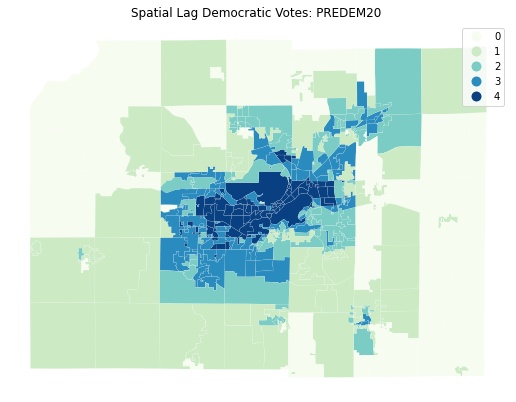

In [29]:
import mapclassify as mc
xlagq5 = mc.Quantiles(xlag, k=5)
f, ax = plt.subplots(1, figsize=(9, 9))
dane_county.assign(cl=xlagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Democratic Votes: PREDEM20 ")
plt.show()

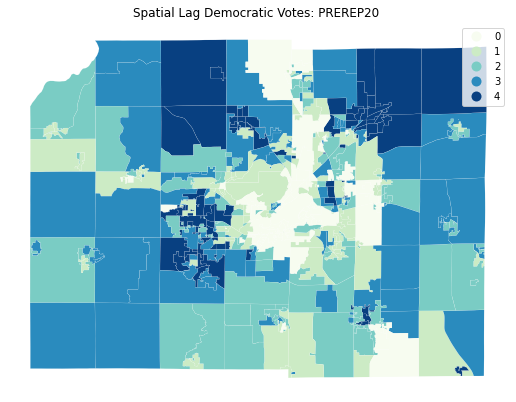

In [30]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)
f, ax = plt.subplots(1, figsize=(9, 9))
dane_county.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Democratic Votes: PREREP20 ")
plt.show()

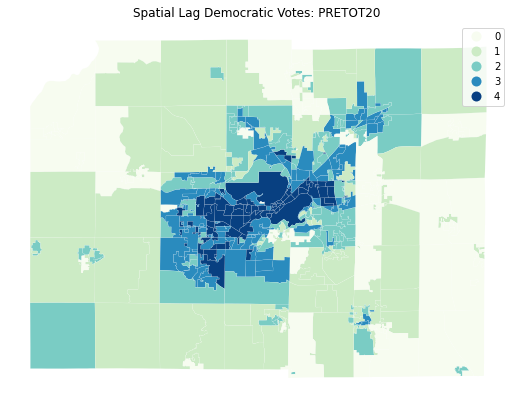

In [32]:
zlagq5 = mc.Quantiles(zlag, k=5)
f, ax = plt.subplots(1, figsize=(9, 9))
dane_county.assign(cl=zlagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Democratic Votes: PRETOT20 ")
plt.show()

In [7]:
# creating definitions to calculate number of polled votes, percentage of DEM votes and REP votes
def polled_votes(row):
    return (row['PREDEM20'] + row['PREREP20'])

def dem_voters(row):
    if not row['PRETOT20'] == 0:
        result = (row['PREDEM20']/row['TOTP_VOT'])*100
        return round(result,2)
    else:
        return 0

def rep_voters(row):
    if not row['PRETOT20'] == 0:
        result = (row['PREREP20']/row['TOTP_VOT'])*100
        return round(result,2)
    else: 
        return 0

In [8]:
dane_county['TOTP_VOT'] = dane_county.apply(lambda row: polled_votes(row), axis = 1)
dane_county['DEM_PCT'] = dane_county.apply(lambda row: dem_voters(row), axis = 1)
dane_county['REP_PCT'] = dane_county.apply(lambda row: rep_voters(row), axis = 1)

C:\Users\ramak\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [11]:
dane_county['REP_PCT']

818     47.14
819     47.04
820     30.67
821     30.58
822     43.41
        ...  
1301    23.25
1302    23.25
1303    23.25
1304    36.33
1305    46.22
Name: REP_PCT, Length: 488, dtype: float64

In [12]:
# calculates Democrat wasted votes for a given ward based on polled votes
def dem_wasted_votes(row):
    if row['DEM_PCT'] >= 50.1:
        excess_pct = (row['DEM_PCT']-50.1)
        if excess_pct > 0:
            wasted_votes = (excess_pct/100)*row['TOTP_VOT']
            return round(wasted_votes)
        else: 
            return 0
    else:
        return 0

In [13]:
dane_county['DEM_WST_VOT'] = dane_county.apply(lambda row: dem_wasted_votes(row), axis = 1)

In [14]:
dane_county_df = dane_county[['GEOID', 'CNTY_NAME', 'MCD_NAME', 'PREDEM20', \
                       'PREREP20', 'PRETOT20', 'DEM_PCT', 'REP_PCT', \
                       'TOTP_VOT', 'DEM_WST_VOT']]
dane_county_df

,GEOID,CNTY_NAME,MCD_NAME,PREDEM20,PREREP20,PRETOT20,DEM_PCT,REP_PCT,TOTP_VOT,DEM_WST_VOT
818,55025008750001,Dane,Albion,323.0000,288.00000,624.000000,52.86,47.14,611.00000,17
819,55025008750002,Dane,Albion,340.0000,302.00000,654.000000,52.96,47.04,642.00000,18
820,55025063000001,Dane,Belleville,443.0000,196.00000,655.000000,69.33,30.67,639.00000,123
821,55025063000002,Dane,Belleville,429.0000,189.00000,630.000000,69.42,30.58,618.00000,119
822,55025070250001,Dane,Berry,176.0000,135.00000,316.000000,56.59,43.41,311.00000,20
...,...,...,...,...,...,...,...,...,...,...
1301,55025515750022,Dane,Middleton,540.7921,163.81289,716.690229,76.75,23.25,704.60499,188
1302,55025776750016,Dane,Stoughton,540.7921,163.81289,716.690229,76.75,23.25,704.60499,188
1303,55025786000027,Dane,Sun Prairie,540.7921,163.81289,716.690229,76.75,23.25,704.60499,188
1304,55025877250010,Dane,Windsor,354.0000,202.00000,564.000000,63.67,36.33,556.00000,75


In [15]:
y = dane_county['DEM_WST_VOT'] # target variable
wq =  lps.weights.Queen.from_dataframe(dane_county) # compute the spatial weights
wq.transform = 'r' # spatial weights require that the matrix is row-standardized 
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.4915480211990326

In [16]:
import seaborn as sbn

Text(0.5, 0, "Moran's I")

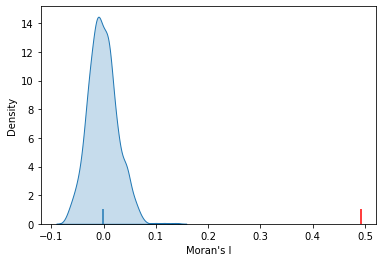

In [17]:
sbn.kdeplot(mi.sim, fill=True)
plt.vlines(mi.I, 0, 1, color='r') # observed value
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

###  Task 2: plot the hotspots and coldspots

In [21]:
y = dane_county['DEM_WST_VOT'] # target variable
wq = lps.weights.Queen.from_dataframe(dane_county)
wq.transform = 'r' 
np.random.seed(12345)

In [19]:
lag_wasted_votes = lps.weights.lag_spatial(wq, dane_county['DEM_WST_VOT'])
wasted_votes = dane_county['DEM_WST_VOT']
b, a = np.polyfit(wasted_votes, lag_wasted_votes, 1)

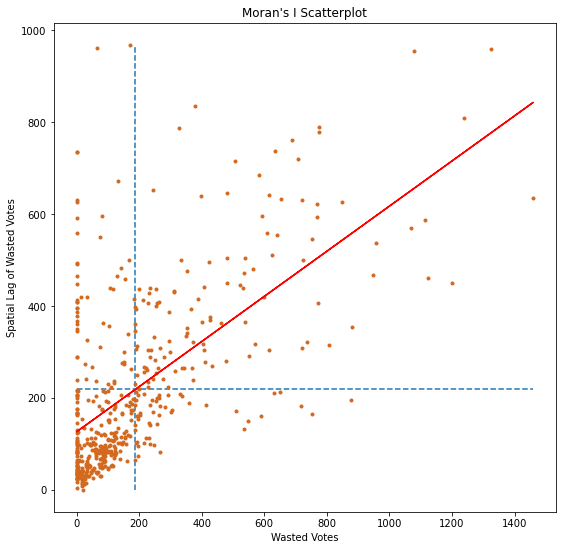

In [26]:
f, ax = plt.subplots(1, figsize=(9, 9))
plt.plot(wasted_votes, lag_wasted_votes, '.', color='chocolate')
 # dashed vert at mean of wasted votes
plt.vlines(wasted_votes.mean(), lag_wasted_votes.min(), lag_wasted_votes.max(), linestyle='--')
 # dashed horizontal at mean lagged wasted votes
plt.hlines(lag_wasted_votes.mean(), wasted_votes.min(), wasted_votes.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(wasted_votes, a + b*wasted_votes, 'r')
plt.title("Moran's I Scatterplot")
plt.ylabel('Spatial Lag of Wasted Votes')
plt.xlabel('Wasted Votes')
plt.show()

In [27]:
li = esda.moran.Moran_Local(y, wq)

In [28]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 3, 0, 0, 3, 3, 0, 0, 3, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0,
       3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3, 3, 3,

In [29]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

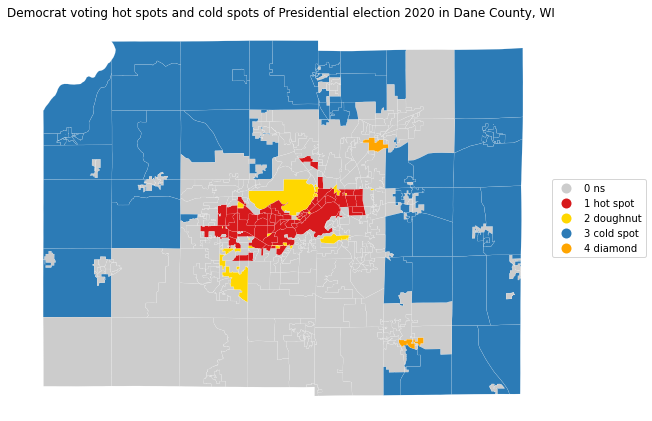

In [33]:
df = dane_county
from matplotlib import colors
hmap = colors.ListedColormap([ '#cccccc', '#d7191c', '#FFD700', '#2c7bb6', '#FFA500'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
plt.title('Democrat voting hot spots and cold spots of Presidential election 2020 in Dane County, WI ')
plt.tight_layout()

,neighbourhood,neighbourhood_group,geometry
0,78739,NaN,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,NaN,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,NaN,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,NaN,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,NaN,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."
5,78747,NaN,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ..."
6,78751,NaN,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
7,78712,NaN,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
8,78738,NaN,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ..."
9,78725,NaN,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ..."


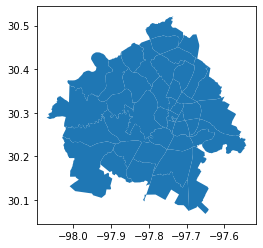

In [33]:
#Download the latest Airbnb house listing data (March 2023) for the city of Austin, Texas, United States http://insideairbnb.com/get-the-data/.

airbnb_gdf =  gpd.read_file('neighbourhoods.geojson')
airbnb_gdf = airbnb_gdf.set_crs(crs='EPSG:4326')
airbnb_gdf.plot()
airbnb_gdf

In [34]:
import wget
wget.download('http://data.insideairbnb.com/united-states/tx/austin/2023-03-16/data/listings.csv.gz')

'listings.csv.gz'

In [40]:
!pip install mgwr

  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46386 sha256=510570d08604bf71540c66a7ade19a6aef1654222e0d0eecd09558829e6b83a0
  Stored in directory: c:\users\ramak\appdata\local\pip\cache\wheels\7f\03\f3\6d95ff5d1911ba9e13f98d96dab2afb10969270ee75ab82bc8
  Created wheel for spglm: filename=spglm-1.0.8-py3-none-any.whl size=38806 sha256=53130a6acf4ad8d3e68386f5c21b020b11d0a62c8ff37bf50f1d1e37df5b20a0
  Stored in directory: c:\users\ramak\appdata\local\pip\cache\wheels\c2\b8\7e\709d2af4286d94d611711d81727d40149e7467ca9a43c5e30c
Successfully built mgwr spglm


In [2]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

## GWR Analysis

## Task 3: Perform the GWR analysis for the median house price at the neighborhood scale using two variables:

In [3]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import matplotlib as mpl

C:\Users\ramak\AppData\Local\Temp/ipykernel_9908/3901792394.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  austin_gdf.centroid.plot(ax=ax, c='gray')


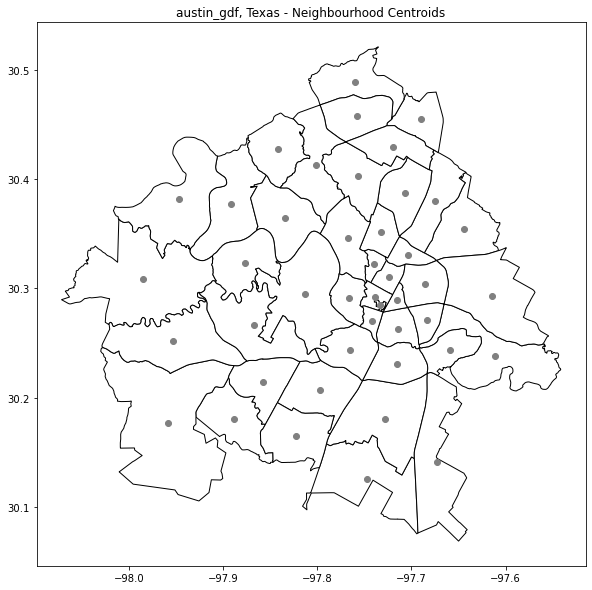

In [4]:
austin_gdf = gpd.read_file('austin_neighbourhoods.geojson')
austin_gdf = austin_gdf.set_crs('EPSG:4326', allow_override=True)

fig, ax = plt.subplots(figsize=(10,10))
austin_gdf.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
austin_gdf.centroid.plot(ax=ax, c='gray')
plt.title('austin_gdf, Texas - Neighbourhood Centroids')
plt.show()

In [5]:
# load the house listing point data using pandas 
at_df = pd.read_csv('austin_listings.csv.gz',compression='gzip')
at_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,2,2,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,2023-03-16,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.76,4.92,NaN,f,1,0,1,0,1.75
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,2023-03-16,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.76
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,2023-03-16,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.10
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,2023-03-17,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.86,4.64,4.57,NaN,f,1,1,0,0,0.30


In [6]:
# read geometry from csv file and convert values in Point(XY) using Shapely.Point
geometry = [Point(xy) for xy in zip(at_df.longitude, at_df.latitude)]
at_gdf = gpd.GeoDataFrame(at_df, geometry=geometry)
at_gdf=at_gdf.set_crs(crs='EPSG:4326')
print(at_gdf.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
at_gdf['price']=at_gdf['price'].str.replace('$','')
at_gdf['price']=at_gdf['price'].str.replace(',','')
at_gdf.head(1)

C:\Users\ramak\AppData\Local\Temp/ipykernel_9908/1796740646.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  at_gdf['price']=at_gdf['price'].str.replace('$','')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.73,4.79,NaN,f,2,2,0,0,3.69,POINT (-97.73441 30.26057)


In [8]:
# check if NaNs are present in price
at_gdf['price'] = at_gdf['price'].astype('float32')
at_gdf['price'].describe()

count    14368.000000
mean       310.029938
std        798.368774
min          0.000000
25%        108.000000
50%        180.000000
75%        320.000000
max      65155.000000
Name: price, dtype: float64

In [9]:
at_gdf['neighbourhood_cleansed']

0        78702
1        78729
2        78704
3        78704
4        78741
         ...  
14363    78705
14364    78705
14365    78705
14366    78734
14367    78741
Name: neighbourhood_cleansed, Length: 14368, dtype: int64

In [10]:
# process the data and compute the median house price per neighborhood polygon  
# compute mean of other explainable variables 

sj_gdf = gpd.sjoin(austin_gdf, at_gdf, how='inner', predicate='intersects', lsuffix='left', rsuffix='right')
median_price_gb = sj_gdf['price'].groupby([sj_gdf['neighbourhood_cleansed']]).median()
print(type(median_price_gb))
median_price_gb

<class 'pandas.core.series.Series'>


neighbourhood_cleansed
78701     279.0
78702     232.0
78703     250.0
78704     203.0
78705     141.0
78712    1035.0
78717     110.0
78719      90.0
78721     180.5
78722     170.0
78723     162.0
78724     135.0
78725     175.0
78726     154.0
78727     125.0
78728     109.0
78729     124.5
78730     245.0
78731     250.0
78732     350.0
78733     317.0
78734     297.0
78735     170.5
78736     183.5
78737     245.5
78738     158.0
78739     256.0
78741     131.0
78742     146.0
78744     130.5
78745     158.0
78746     385.0
78747     104.5
78748     128.0
78749     150.0
78750     127.0
78751     121.0
78752     110.5
78753     118.5
78754     100.0
78756     134.0
78757     149.0
78758     129.0
78759     140.0
Name: price, dtype: float32

In [11]:
at_gdf['bedrooms'] = at_gdf['bedrooms'].astype('float32')
sj_gdf = gpd.sjoin(austin_gdf, at_gdf, how='inner', predicate='intersects', lsuffix='left', rsuffix='right')
bedrooms_gb = sj_gdf['bedrooms'].groupby([sj_gdf['neighbourhood_cleansed']]).median()
print(type(bedrooms_gb))
bedrooms_gb

<class 'pandas.core.series.Series'>


neighbourhood_cleansed
78701    1.0
78702    2.0
78703    2.0
78704    2.0
78705    1.0
78712    1.5
78717    1.0
78719    1.0
78721    2.0
78722    2.0
78723    2.0
78724    1.0
78725    2.5
78726    1.0
78727    2.0
78728    2.0
78729    2.0
78730    2.0
78731    3.0
78732    3.0
78733    2.0
78734    3.0
78735    1.5
78736    2.0
78737    2.0
78738    2.0
78739    3.0
78741    1.0
78742    2.0
78744    2.0
78745    2.0
78746    3.0
78747    2.0
78748    2.0
78749    2.0
78750    2.0
78751    1.0
78752    1.5
78753    2.0
78754    1.0
78756    1.0
78757    2.0
78758    1.0
78759    1.0
Name: bedrooms, dtype: float32

In [12]:
at_gdf['review_scores_value'] = at_gdf['review_scores_value'].astype('float32')
sj_gdf = gpd.sjoin(austin_gdf, at_gdf, how='inner', predicate='intersects', lsuffix='left', rsuffix='right')
review_scores_value_gb = sj_gdf['review_scores_value'].groupby([sj_gdf['neighbourhood_cleansed']]).median()
print(type(review_scores_value_gb))
review_scores_value_gb

<class 'pandas.core.series.Series'>


neighbourhood_cleansed
78701    4.770
78702    4.850
78703    4.830
78704    4.840
78705    4.720
78712      NaN
78717    4.920
78719    4.815
78721    4.860
78722    4.890
78723    4.900
78724    4.895
78725    4.935
78726    5.000
78727    4.870
78728    4.860
78729    4.870
78730    4.895
78731    4.890
78732    4.870
78733    4.900
78734    4.820
78735    4.960
78736    4.900
78737    4.910
78738    4.880
78739    5.000
78741    4.860
78742    4.860
78744    4.910
78745    4.880
78746    4.850
78747    4.955
78748    4.900
78749    4.920
78750    4.890
78751    4.860
78752    4.760
78753    4.900
78754    4.910
78756    4.860
78757    4.880
78758    4.815
78759    4.930
Name: review_scores_value, dtype: float32

In [13]:
# rename 'neighbourhood_cleansed' as 'neighbourhood'
median_price_gb.rename('neighbourhood')

# ensure the index key has the same data type of string
median_price_gb.index = median_price_gb.index.map(str) 
bedrooms_gb.index = bedrooms_gb.index.map(str)
review_scores_value_gb.index = review_scores_value_gb.index.map(str)

# neighborhood column as str
austin_gdf['neighbourhood'] = austin_gdf['neighbourhood'].astype('string')
# perform join based on neighborhood and append median price
austin_gdf = austin_gdf.merge(median_price_gb, left_on='neighbourhood', right_index=True, how='left')
austin_gdf.rename(columns={'price': 'median_price'}, inplace=True)

# perform join based on neighborhood and append mean bedrooms
austin_gdf = austin_gdf.merge(bedrooms_gb, left_on='neighbourhood', right_index=True, how='left')
austin_gdf.rename(columns={'bedrooms': 'mean_bedrooms'}, inplace=True)

# perform join based on neighborhood and append mean review scores
austin_gdf = austin_gdf.merge(review_scores_value_gb, left_on='neighbourhood', right_index=True, how='left')
austin_gdf.rename(columns={'review_scores_value': 'mean_review_scores'}, inplace=True)

austin_gdf.head()

,neighbourhood,neighbourhood_group,geometry,median_price,mean_bedrooms,mean_review_scores
0,78739,NaN,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",256.0,3.0,5.00
1,78754,NaN,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",100.0,1.0,4.91
2,78732,NaN,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",350.0,3.0,4.87
3,78737,NaN,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",245.5,2.0,4.91
4,78756,NaN,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",134.0,1.0,4.86


In [14]:
# replace NaN review scores with mean values
austin_gdf['mean_review_scores'].fillna((austin_gdf['mean_review_scores'].mean()), inplace=True)
austin_gdf.head(1)

,neighbourhood,neighbourhood_group,geometry,median_price,mean_bedrooms,mean_review_scores
0,78739,NaN,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",256.0,3.0,5.0


In [15]:
from shapely.geometry import Polygon,Point
austin_gdf['centroid'] = austin_gdf['geometry'].centroid
austin_gdf.head(1)

C:\Users\ramak\AppData\Local\Temp/ipykernel_9908/1221046906.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  austin_gdf['centroid'] = austin_gdf['geometry'].centroid


,neighbourhood,neighbourhood_group,geometry,median_price,mean_bedrooms,mean_review_scores,centroid
0,78739,NaN,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",256.0,3.0,5.0,POINT (-97.88843 30.18001)


In [16]:
# reextract x,y values from centroid (long,lat)
point_list = [(point.x, point.y) for point in austin_gdf['centroid']]
point_list

austin_gdf['centroid'] = point_list
austin_gdf['centroid']

0       (-97.88842700905164, 30.1800114259101)
1     (-97.64419330961809, 30.354197431882877)
2      (-97.89173446369308, 30.37742536449877)
3      (-97.95868638314958, 30.17641776484928)
4     (-97.73985494402544, 30.322114343635842)
5       (-97.74671954478403, 30.1258015895132)
6     (-97.72387636070845, 30.310146139510636)
7      (-97.73320820467542, 30.28517390474301)
8     (-97.98549853270535, 30.308436449906324)
9     (-97.61077639007817, 30.238143299341658)
10    (-97.73203844427115, 30.351450343624414)
11    (-97.68980022594656, 30.454938584368772)
12    (-97.72819831143767, 30.180529147016017)
13    (-97.95262635937809, 30.251567474260174)
14      (-97.71453938329925, 30.2631761625669)
15    (-97.71488436527063, 30.230395652853787)
16      (-97.67297351690388, 30.1410587613943)
17     (-97.65900617894462, 30.24371181264058)
18    (-97.71556494680902, 30.289371673869546)
19     (-97.7661805265652, 30.291097550613866)
20    (-97.75951416809121, 30.489174835855064)
21     (-97.8

In [17]:
# code taken from GWR Georgia. g_y (price) is dependent on independent values of g_x (bedrooms, review scores)
g_y = austin_gdf['median_price'].values.reshape((-1,1))
g_x = austin_gdf[['mean_bedrooms','mean_review_scores']].values
g_coords = list(austin_gdf['centroid'])

g_X = (g_x - g_x.mean(axis=0)) / g_x.std(axis=0)
g_y = g_y.reshape((-1,1))
g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [18]:
#Calibrate GWR model
gwr_selector = Sel_BW(g_coords, g_y, g_x)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_x, gwr_bw).fit()

42.0


In [19]:
print(gwr_results.params.shape) # get the shape (# of locations, # of Coeffiicents); (number of rows, number of columns)
gwr_results.params[0:,0]

(44, 3)


array([11.26153264,  2.79141793,  4.32303431, 11.32450052,  0.45644815,
        8.32231861,  1.13802502,  1.68967552,  8.13517074,  4.33311526,
        1.2246039 ,  1.978778  ,  6.55367855,  9.80797283,  3.21398061,
        4.25211561,  6.7270282 ,  4.06683356,  2.12151229, -0.67668769,
        1.87177944, 10.24338   ,  3.28752649,  7.59993193,  0.81044536,
        9.54225781,  1.9415616 ,  1.89914806,  3.53343858,  3.89230816,
        2.36160193,  1.01660919,  1.91840742,  2.89647859,  1.88280675,
        2.1294366 ,  6.16664493,  2.41944789,  2.09561897,  8.51785252,
        3.41571096,  1.87194103,  5.05851153,  2.25999196])

In [20]:
gwr_results.localR2

array([[0.07425066],
       [0.05849229],
       [0.14543757],
       [0.09620776],
       [0.05547607],
       [0.0505902 ],
       [0.0530154 ],
       [0.04852944],
       [0.14089947],
       [0.04820925],
       [0.06619914],
       [0.07891149],
       [0.04670571],
       [0.10760607],
       [0.04944815],
       [0.0457824 ],
       [0.04760085],
       [0.04864474],
       [0.05106831],
       [0.0383774 ],
       [0.11193918],
       [0.06281094],
       [0.11130671],
       [0.04905014],
       [0.07114456],
       [0.05865754],
       [0.10651281],
       [0.05860738],
       [0.05136299],
       [0.04151995],
       [0.06494168],
       [0.04802113],
       [0.07148914],
       [0.04477959],
       [0.09303175],
       [0.14355479],
       [0.10408454],
       [0.05326352],
       [0.11693615],
       [0.07290184],
       [0.05151659],
       [0.08451196],
       [0.15813897],
       [0.04616489]])

In [21]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  44
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             41.625
Log-likelihood:                                                     -61.212
AIC:                                                                128.425
AICc:                                                               131.451
BIC:                                                               -113.527
R2:                                                                   0.054
Adj. R2:                                                              0.008

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [23]:
# Plotting local R-square values on a map
austin_gdf['R_square'] =gwr_results.localR2
austin_gdf['GWR_bedroom'] =gwr_results.params[0:,1]
austin_gdf['GWR_review_scores_value'] =gwr_results.params[0:,2]

austin_gdf.head()

,neighbourhood,neighbourhood_group,geometry,median_price,mean_bedrooms,mean_review_scores,centroid,R_square,GWR_bedroom,GWR_review_scores_value
0,78739,NaN,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",256.0,3.0,5.00,"(-97.88842700905164, 30.1800114259101)",0.074251,0.391887,-2.429500
1,78754,NaN,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",100.0,1.0,4.91,"(-97.64419330961809, 30.354197431882877)",0.058492,0.269899,-0.675235
2,78732,NaN,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",350.0,3.0,4.87,"(-97.89173446369308, 30.37742536449877)",0.145438,0.451997,-1.029631
3,78737,NaN,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",245.5,2.0,4.91,"(-97.95868638314958, 30.17641776484928)",0.096208,0.417229,-2.452534
4,78756,NaN,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",134.0,1.0,4.86,"(-97.73985494402544, 30.322114343635842)",0.055476,0.287819,-0.176269


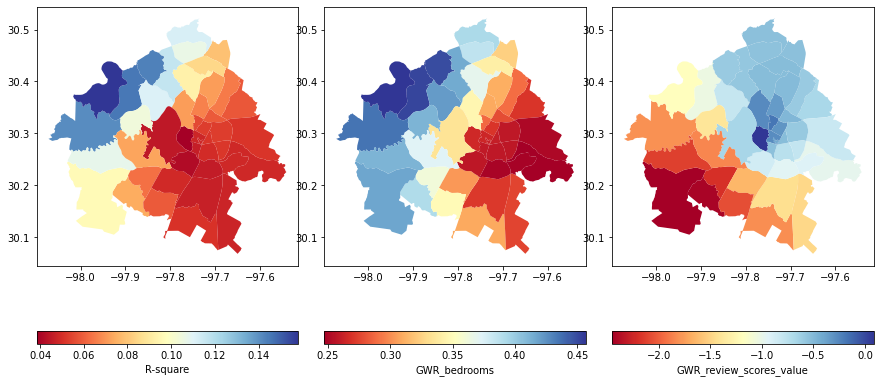

In [25]:
import matplotlib.pyplot as plt

# create one row, multiple columns of sub-figures
fig, ax = plt.subplots(1, 3, figsize=(15, 8)) 
# adjust horizontal space between subplots
fig.subplots_adjust(wspace=0.1) 

# creating various plots
austin_gdf.plot(ax=ax[0], column='R_square', cmap='RdYlBu', legend=True, legend_kwds={'label': "R-square",
                        'orientation': "horizontal"})
austin_gdf.plot(ax=ax[1],  column='GWR_bedroom', cmap='RdYlBu', legend=True, legend_kwds={'label': "GWR_bedrooms",
                        'orientation': "horizontal"})
austin_gdf.plot(ax=ax[2],  column='GWR_review_scores_value', cmap='RdYlBu', legend=True, \
         legend_kwds={'label': "GWR_review_scores_value",
                        'orientation': "horizontal"})
plt.show()

# END of Task

0
0


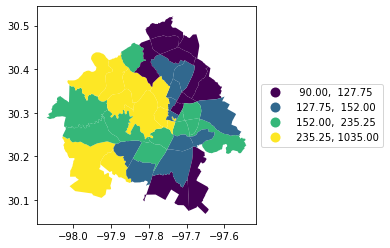

In [ ]:
# check the neighborhood with 'NAN' values
# fill the NAN values with median prices
# More color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

print(pd.isnull(austin_gdf['median_pri']).sum())
austin_gdf['median_pri'].fillna((austin_gdf['median_pri'].median()), inplace=True)

ax = austin_gdf.plot(column='median_pri', scheme='QUANTILES', k=4, \
             cmap='viridis', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

print(pd.isnull(austin_gdf['median_pri']).sum())